In [3]:
import numpy as np
np.random.seed(1)
learning_rate = 0.1
epoch = 20000
inputs = np.array([[0,0], [0,1], [1,0], [1,1]])
y_true = np.array([[0,1,1,0]]).T

class Dense_Layer:
	def __init__(self, n_inputs, n_neurons):
		self.biases = np.zeros((1, n_neurons))
		self.weights = np.random.random((n_inputs, n_neurons))
	def forward(self, inputs):
		self.inputs = inputs
		self.output = (np.dot(inputs, self.weights) + self.biases)
	def backward(self, dvalues):
		self.dweights = np.dot(self.inputs.T, dvalues)
		self.dinputs = np.dot(dvalues, self.weights.T)

class Activation_ReLU:
	def forward(self, inputs):
		self.inputs = inputs
		self.output = np.maximum(0, self.inputs)
	def forward(self, dvalues):
		self.dinputs = dvalues.copy()
		self.dinputs[self.inputs <= 0] = 0


class Activation_Sigmoid:
	def forward(self, inputs):
		self.inputs = inputs
		self.output = 1/(1+np.exp(-1*inputs))
	def backward(self, dvalues):
		sigmoid = self.output
		d_sigmoid = (sigmoid)*(1-sigmoid)
		self.dinputs = np.multiply(dvalues, d_sigmoid)

class Loss:
	def forward(self, y_pred, y_true):
		self.output = np.subtract(y_true , y_pred)
		self.cost = 1/2*(self.output)*(self.output)
	def backward(self, dinputs):
		self.dinputs = (-1*dinputs)

layer1 = Dense_Layer(2, 3)
activation1 = Activation_Sigmoid()
layer2 = Dense_Layer(3,1)

loss = Loss()


for iteration in range(20000):
    layer1.forward(inputs)
    activation1.forward(layer1.output) #hidden layer

    layer2.forward(activation1.output)


    loss.forward(layer2.output, y_true) #loss
    loss.backward(loss.output)


    layer2.backward(loss.dinputs)


    layer2.weights -= learning_rate*layer2.dweights
    activation1.backward(layer2.dinputs)
    layer1.backward(activation1.dinputs)


    layer1.weights -= layer1.dweights


newInput = np.array([[0,0],[0,1],[1,0],[1,1]])


def calculate_new_data(inputs):
	layer1.forward(inputs)
	activation1.forward(layer1.output)

	layer2.forward(activation1.output)


	for i in range(newInput.shape[0]):
		print(f'{inputs[i]} --> {layer2.output[i]}\n')

calculate_new_data(newInput)


[0 0] --> [0.00315755]

[0 1] --> [1.01054389]

[1 0] --> [1.01729287]

[1 1] --> [0.01596857]



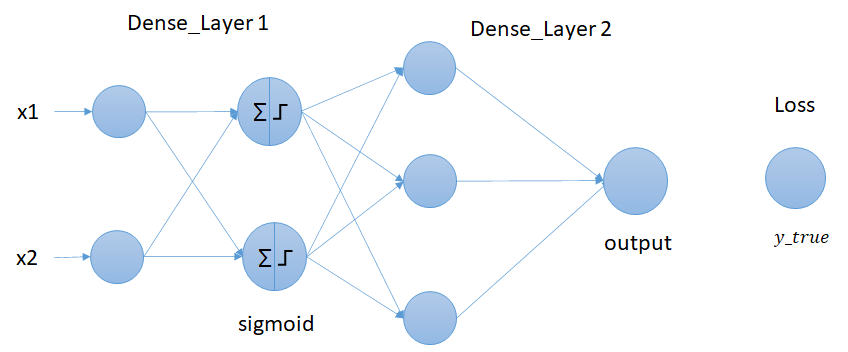